In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [47]:
import os

# Print the directory Python is looking in
print(os.getcwd())

/Users/chriswinge/Desktop/Job Projects/Cooperative Election Study Common Content, 2024


In [48]:
data = pd.read_csv('dataverse_files/CCES24_Common_OUTPUT_vv_topost_final.csv')

data.head()

,caseid,tookpost,commonweight,commonpostweight,vvweight,vvweight_post,CCEStake,add_confirm,inputzip,birthyr,...,starttime_post,endtime_post,TS_g2024,TS_voterstatus,TS_p2024,TS_p2024_party,TS_pp2024,TS_pp2024_party,TS_state,TS_partyreg
0,1853651564,2,0.418897,0.180057,1.407497,0.822485,1,1.0,NaN,1978,...,2024-11-09 03:00:05,2024-11-09 03:09:39,3.0,1.0,7.0,NaN,7.0,NaN,PA,2.0
1,1853655732,2,0.946650,0.700897,0.470183,0.435126,1,NaN,11236.0,1968,...,2024-11-10 22:46:35,2024-11-10 22:56:59,2.0,1.0,7.0,NaN,7.0,NaN,NY,8.0
2,1852716424,2,0.194303,0.046275,0.245400,0.172787,1,1.0,NaN,1946,...,2024-11-11 03:52:52,2024-11-11 04:11:38,3.0,1.0,7.0,NaN,7.0,NaN,PA,NaN
3,1853644254,2,0.083223,0.008897,0.465415,0.636743,1,NaN,90039.0,2001,...,2024-12-08 03:31:26,2024-12-08 04:30:16,1.0,1.0,7.0,NaN,7.0,NaN,CA,NaN
4,1853644132,2,0.596598,0.555395,1.676258,1.609462,1,1.0,NaN,1955,...,2024-11-06 23:47:48,2024-11-07 00:27:52,1.0,1.0,1.0,NaN,7.0,NaN,MT,NaN


In [49]:
dem_defectors = data[['pid7', 'TS_p2024_party', 'vvweight_post', 'CC24_410', 'CC24_341a', 'CC24_341b', 'CC24_341c', 'CC24_341d']].copy()

In [50]:
dem_defectors

,pid7,TS_p2024_party,vvweight_post,CC24_410,CC24_341a,CC24_341b,CC24_341c,CC24_341d
0,1,NaN,0.822485,1.0,1.0,1.0,1.0,1.0
1,7,NaN,0.435126,1.0,2.0,1.0,2.0,1.0
2,3,NaN,0.172787,1.0,2.0,1.0,1.0,1.0
3,2,NaN,0.636743,NaN,1.0,2.0,1.0,1.0
4,6,NaN,1.609462,2.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
59995,5,6.0,2.730659,2.0,1.0,2.0,2.0,2.0
59996,3,1.0,0.654171,1.0,2.0,2.0,1.0,1.0
59997,1,NaN,0.619091,1.0,1.0,1.0,1.0,1.0
59998,1,NaN,8.972966,1.0,2.0,2.0,2.0,1.0


In [51]:
primary_vote_dem = dem_defectors[dem_defectors['TS_p2024_party'] == 1]

primary_vote_dem

,pid7,TS_p2024_party,vvweight_post,CC24_410,CC24_341a,CC24_341b,CC24_341c,CC24_341d
28,1,1.0,0.362748,1.0,1.0,1.0,1.0,1.0
34,1,1.0,0.780196,1.0,2.0,1.0,1.0,1.0
37,1,1.0,0.239447,1.0,1.0,1.0,1.0,1.0
44,2,1.0,0.546106,1.0,2.0,1.0,1.0,2.0
49,1,1.0,0.226152,1.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
58842,1,1.0,1.488981,1.0,2.0,1.0,1.0,1.0
59048,1,1.0,0.834012,1.0,2.0,1.0,1.0,1.0
59737,1,1.0,1.366546,1.0,1.0,1.0,1.0,1.0
59990,2,1.0,2.691005,1.0,1.0,2.0,1.0,1.0


In [52]:
no_vote_harris = primary_vote_dem[primary_vote_dem['CC24_410'] != 1]

no_vote_harris

,pid7,TS_p2024_party,vvweight_post,CC24_410,CC24_341a,CC24_341b,CC24_341c,CC24_341d
139,1,1.0,NaN,NaN,2.0,1.0,1.0,1.0
154,4,1.0,0.355519,4.0,2.0,1.0,1.0,1.0
383,2,1.0,NaN,NaN,2.0,1.0,1.0,1.0
397,2,1.0,NaN,NaN,1.0,1.0,2.0,1.0
534,1,1.0,NaN,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
57243,1,1.0,NaN,NaN,1.0,1.0,1.0,1.0
57284,2,1.0,NaN,NaN,1.0,1.0,2.0,1.0
58271,4,1.0,0.922927,2.0,1.0,1.0,1.0,1.0
58538,1,1.0,NaN,NaN,1.0,2.0,1.0,1.0


In [53]:
no_vote_harris_final = no_vote_harris.dropna(subset=['vvweight_post', 'CC24_410','CC24_341b']).copy()

In [54]:
no_vote_harris_final

,pid7,TS_p2024_party,vvweight_post,CC24_410,CC24_341a,CC24_341b,CC24_341c,CC24_341d
154,4,1.0,0.355519,4.0,2.0,1.0,1.0,1.0
1726,4,1.0,0.476373,4.0,2.0,1.0,1.0,1.0
1868,5,1.0,0.355991,2.0,1.0,1.0,1.0,1.0
1891,2,1.0,2.475970,8.0,2.0,1.0,1.0,1.0
2060,4,1.0,0.756951,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
55984,4,1.0,0.200951,2.0,1.0,2.0,1.0,1.0
56150,5,1.0,0.201125,9.0,1.0,2.0,2.0,2.0
56563,4,1.0,0.630207,4.0,2.0,1.0,1.0,1.0
56793,3,1.0,0.174988,2.0,2.0,1.0,2.0,1.0


In [55]:
def support_for(support):
    if support == 1:
        return 1
    elif support == 2:
        return 0
    else:
        return None

In [56]:
no_vote_harris_final.loc[:, 'extend_tax_cuts - 341a'] = no_vote_harris_final['CC24_341a'].apply(support_for)
no_vote_harris_final.loc[:, 'raise_corp_tax_rate - 341b'] = no_vote_harris_final['CC24_341b'].apply(support_for)
no_vote_harris_final.loc[:, 'raise_taxes_400K - 341c'] = no_vote_harris_final['CC24_341c'].apply(support_for)
no_vote_harris_final.loc[:, '150b_infastructure - 341d'] = no_vote_harris_final['CC24_341d'].apply(support_for)

no_vote_harris_final

,pid7,TS_p2024_party,vvweight_post,CC24_410,CC24_341a,CC24_341b,CC24_341c,CC24_341d,extend_tax_cuts - 341a,raise_corp_tax_rate - 341b,raise_taxes_400K - 341c,150b_infastructure - 341d
154,4,1.0,0.355519,4.0,2.0,1.0,1.0,1.0,0.0,1,1.0,1.0
1726,4,1.0,0.476373,4.0,2.0,1.0,1.0,1.0,0.0,1,1.0,1.0
1868,5,1.0,0.355991,2.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0
1891,2,1.0,2.475970,8.0,2.0,1.0,1.0,1.0,0.0,1,1.0,1.0
2060,4,1.0,0.756951,2.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
55984,4,1.0,0.200951,2.0,1.0,2.0,1.0,1.0,1.0,0,1.0,1.0
56150,5,1.0,0.201125,9.0,1.0,2.0,2.0,2.0,1.0,0,0.0,0.0
56563,4,1.0,0.630207,4.0,2.0,1.0,1.0,1.0,0.0,1,1.0,1.0
56793,3,1.0,0.174988,2.0,2.0,1.0,2.0,1.0,0.0,1,0.0,1.0


In [57]:
no_vote_harris_final['extend_tax_cuts - 341a'].value_counts(dropna=False)

1.0    124
0.0    108
NaN      1
Name: extend_tax_cuts - 341a, dtype: int64

In [58]:
no_vote_harris_final['raise_corp_tax_rate - 341b'].value_counts(dropna=False)

1    145
0     88
Name: raise_corp_tax_rate - 341b, dtype: int64

In [59]:
no_vote_harris_final['raise_taxes_400K - 341c'].value_counts(dropna=False)

1.0    158
0.0     74
NaN      1
Name: raise_taxes_400K - 341c, dtype: int64

In [60]:
no_vote_harris_final['150b_infastructure - 341d'].value_counts(dropna=False)

1.0    196
0.0     36
NaN      1
Name: 150b_infastructure - 341d, dtype: int64

In [61]:
no_vote_harris_final

,pid7,TS_p2024_party,vvweight_post,CC24_410,CC24_341a,CC24_341b,CC24_341c,CC24_341d,extend_tax_cuts - 341a,raise_corp_tax_rate - 341b,raise_taxes_400K - 341c,150b_infastructure - 341d
154,4,1.0,0.355519,4.0,2.0,1.0,1.0,1.0,0.0,1,1.0,1.0
1726,4,1.0,0.476373,4.0,2.0,1.0,1.0,1.0,0.0,1,1.0,1.0
1868,5,1.0,0.355991,2.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0
1891,2,1.0,2.475970,8.0,2.0,1.0,1.0,1.0,0.0,1,1.0,1.0
2060,4,1.0,0.756951,2.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
55984,4,1.0,0.200951,2.0,1.0,2.0,1.0,1.0,1.0,0,1.0,1.0
56150,5,1.0,0.201125,9.0,1.0,2.0,2.0,2.0,1.0,0,0.0,0.0
56563,4,1.0,0.630207,4.0,2.0,1.0,1.0,1.0,0.0,1,1.0,1.0
56793,3,1.0,0.174988,2.0,2.0,1.0,2.0,1.0,0.0,1,0.0,1.0


In [63]:
policies = [
    'extend_tax_cuts - 341a',
    'raise_corp_tax_rate - 341b',
    'raise_taxes_400K - 341c',
    '150b_infastructure - 341d'
]

for policy in policies:
    mask = no_vote_harris_final[policy].notna() # - using only valide responses
    
    valid_data = no_vote_harris_final.loc[mask, policy]
    valid_weights = no_vote_harris_final.loc[mask, 'vvweight_post']
    
    support_pct = np.average(valid_data, weights=valid_weights)
    
    print(f"Support for {policy}: {support_pct: .1%}")

Support for extend_tax_cuts - 341a:  60.9%
Support for raise_corp_tax_rate - 341b:  57.7%
Support for raise_taxes_400K - 341c:  58.8%
Support for 150b_infastructure - 341d:  85.5%


In [73]:
def weighted_avg_extend_corp_tax_cuts(group):
    mask = group['extend_tax_cuts - 341a'].notna()
    
    d = group.loc[mask, 'extend_tax_cuts - 341a']
    w = group.loc[mask, 'vvweight_post']
    
    return np.average(d, weights=w)

support_by_pid = no_vote_harris_final.groupby('pid7').apply(weighted_avg_extend_corp_tax_cuts)

support_by_pid

pid7
1    0.422976
2    0.778997
3    0.130272
4    0.433303
5    0.875222
6    0.521344
7    0.866068
8    1.000000
dtype: float64

In [72]:
def weighted_avg_raise_corp_tax(group):
    mask = group['raise_corp_tax_rate - 341b'].notna()
    
    d = group.loc[mask, 'raise_corp_tax_rate - 341b']
    w = group.loc[mask, 'vvweight_post']
    
    return np.average(d, weights=w)

support_raising_corp_tax_rate_pid = no_vote_harris_final.groupby('pid7').apply(weighted_avg_raise_corp_tax)

support_raising_corp_tax_rate_pid

pid7
1    0.810555
2    0.583098
3    0.860711
4    0.616924
5    0.600348
6    0.249188
7    0.229072
8    1.000000
dtype: float64

In [84]:
def raise_tax_over_400k(group):
    mask = group['raise_taxes_400K - 341c'].notna()
    
    d = group.loc[mask, 'raise_taxes_400K - 341c']
    w = group.loc[mask, 'vvweight_post']
    
    return np.average(d, weights=w)

support_for_raising_taxes_pid = no_vote_harris_final.groupby('pid7').apply(raise_tax_over_400k)

support_for_raising_taxes_pid

pid7
1    0.790356
2    0.554764
3    0.991317
4    0.733972
5    0.336725
6    0.411042
7    0.283213
8    1.000000
dtype: float64

In [91]:
def support_for_infrastructure(group):
    mask = group['150b_infastructure - 341d'].notna()
    
    d = group.loc[mask, '150b_infastructure - 341d']
    w = group.loc[mask, 'vvweight_post']
    
    return np.average(d, weights=w)

infrastructure = no_vote_harris_final.groupby('pid7').apply(support_for_infrastructure)

infrastructure

pid7
1    0.975962
2    0.997001
3    0.948409
4    0.903275
5    0.767819
6    0.858892
7    0.523501
8    1.000000
dtype: float64

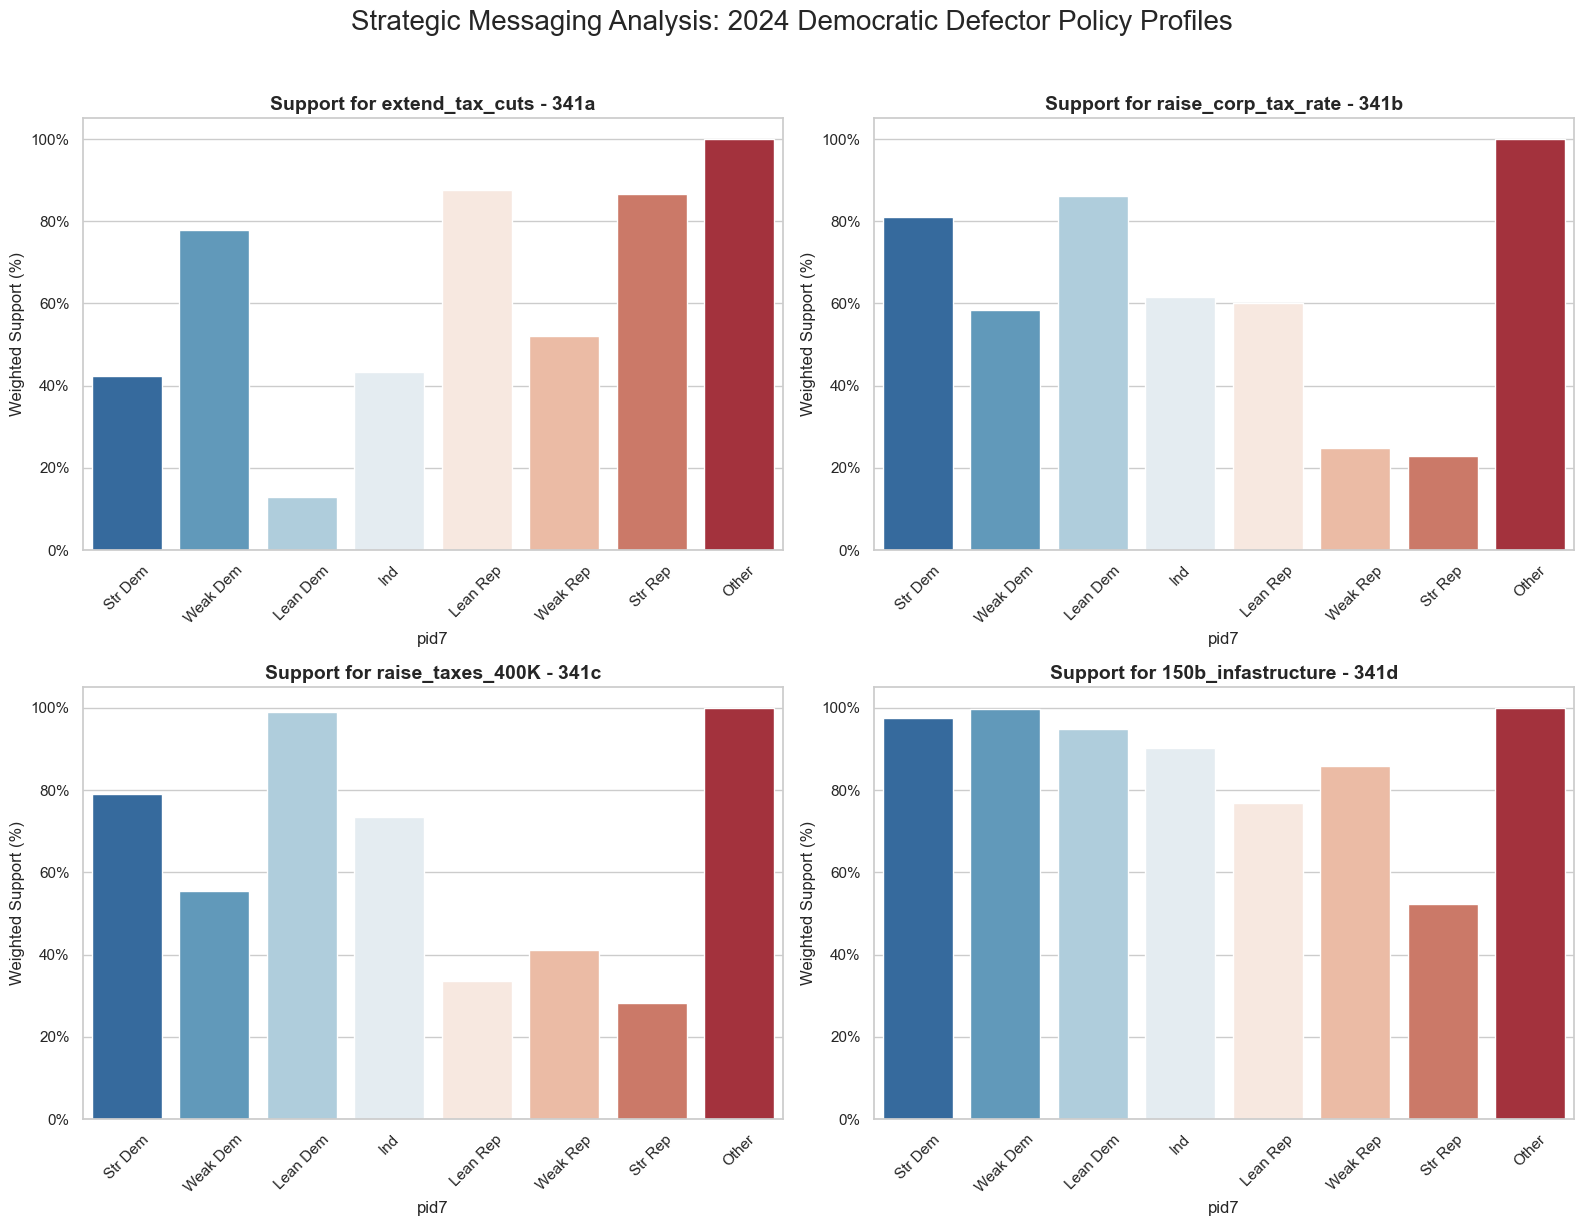

In [149]:
sns.set_theme(style='whitegrid')
fig, axes = plt.subplots(2,2, figsize=(16,12))
axes = axes.flatten()

pid_labels = ['Str Dem', 'Weak Dem', 'Lean Dem', 'Ind', 'Lean Rep', 'Weak Rep', 'Str Rep', 'Other']

for i, policy in enumerate(policies):

    group_results = no_vote_harris_final.groupby('pid7').apply(
                        lambda g: np.average(g[policy].dropna(),
                                weights=no_vote_harris_final.loc[g[policy].dropna().index, 'vvweight_post'])
                        if not g[policy].dropna().empty else 0
                    )
    sns.barplot(x=group_results.index.map(int) - 1, y=group_results.values, ax=axes[i], palette='RdBu_r')
    axes[i].set_title(f"Support for {policy}", fontsize=14, fontweight='bold')
    axes[i].set_ylim(0, 1.05)
    axes[i].set_ylabel('Weighted Support (%)')
    axes[i].set_xticklabels(pid_labels, rotation=45)
    axes[i].yaxis.set_major_formatter(PercentFormatter(xmax=1.0))

plt.suptitle('Strategic Messaging Analysis: 2024 Democratic Defector Policy Profiles', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()